# ECE Board Exam Problem

##### The problem revolves around analyzing an ECE Board Exam dataset. The dataset contains various details such as student names, genders, academic tracks, scores in subjects like Math, GEAS, and Electronics, along with their average scores and hometowns. The goal is to:

1. Manipulate the data by creating specific filtered data frames.
2. Visualize the data to understand how different factors (such as gender, hometown, or academic track) contribute to the overall performance (average grade).
   
##### This involves using data wrangling techniques to process the dataset, and then employing data visualization methods to provide insights into the relationship between the features and exam results.

---

### Data Frame Creation: 

##### Before working with the data, it’s essential to load the dataset into Python to understand its structure. Both the function and the output are provided below.

In [107]:
import pandas as pd

# First, load the data from the Excel file
board = pd.read_excel('board2.xlsx')
board

,Name,Gender,Track,Hometown,Math,Electronics,GEAS,Communication
0,S1,Male,Instrumentation,Luzon,58,89,75,78
1,S2,Female,Communication,Mindanao,52,75,90,52
2,S3,Female,Instrumentation,Mindanao,83,74,77,57
3,S4,Male,Instrumentation,Visayas,65,58,91,68
4,S5,Male,Communication,Luzon,59,86,43,88
5,S6,Female,Microelectronics,Visayas,88,45,86,83
6,S7,Female,Instrumentation,Luzon,66,60,60,48
7,S8,Male,Instrumentation,Luzon,49,81,64,53
8,S9,Male,Instrumentation,Luzon,50,36,63,42
9,S10,Male,Microelectronics,Mindanao,80,84,61,44


### (a) Data Frame: "Instru"
   
##### The task here is to create a data frame with:

- Columns: `Name`, `GEAS`, and `Electronics`.
- Filter conditions:
    - Electronics score > 70
    - Track = Instrumentation
    - Hometown = Luzon
  
##### The resulting data frame should show students that meet these criteria.

In [109]:
# Filter rows where 'Track' is 'Instrumentation', 'Hometown' is 'Luzon', and 'Electronics' score is above 70
Instru = board[(board['Track'] == 'Instrumentation') & (board['Hometown'] == 'Luzon') & (board['Electronics'] > 70)]

# Select and display the relevant columns: 'Name', 'GEAS', and 'Electronics'
Instru[['Name', 'GEAS', 'Electronics']]

,Name,GEAS,Electronics
0,S1,75,89
7,S8,64,81
29,S30,57,81


### (b) Data Frame: "Mindy"

##### In this data frame:

- Columns: `Name`, `Track`, `Electronics`, and `Average`.
- Filter conditions:
    - Average score >= 55
    - Track = Electronics
    - Hometown = Mindanao
    - Gender = Female
      
##### After applying these filters, the resulting data should be stored in a new data frame.

In [111]:
# Filter the DataFrame select only the rows where the 'Hometown' is 'Mindanao' and the 'Gender' is 'Female'.
Mindy = board[(board['Hometown'] == 'Mindanao') & (board['Gender'] == 'Female')].copy()

# Calculate the average of 'Math', 'Electronics', 'GEAS', and 'Communication' for each row
Mindy['Average'] = Mindy[['Math', 'Electronics', 'GEAS', 'Communication']].mean(axis=1)

# Filter the rows to retain only those where the calculated average is 55 or higher.
Mindy = Mindy[Mindy['Average'] >= 55]

# Select and display the relevant columns: 'Name', 'Track', 'Electronics', and 'Average'
Mindy[['Name', 'Track', 'Electronics', 'Average']]

,Name,Track,Electronics,Average
1,S2,Communication,75,67.25
2,S3,Instrumentation,74,72.75
14,S15,Microelectronics,41,59.00
16,S17,Microelectronics,79,70.50
19,S20,Communication,60,66.50


---

### Data Visualization: 

##### This part focuses on creating a visualization to show how various features contribute to the overall average score:

- The task involves analyzing how track in college, gender, and hometown affect performance (average score).
- Visualization tools like bar charts, box plots, or scatter plots can be used to depict trends in the dataset.
  
##### The goal is to use these visualizations to highlight factors that correlate with higher or lower performance in the exam results.

1. `Gender Bar Chart:` The bar chart below compares the average scores of male and female students that can help identify performance trends by gender. This chart could show whether one gender tends to perform better on average.

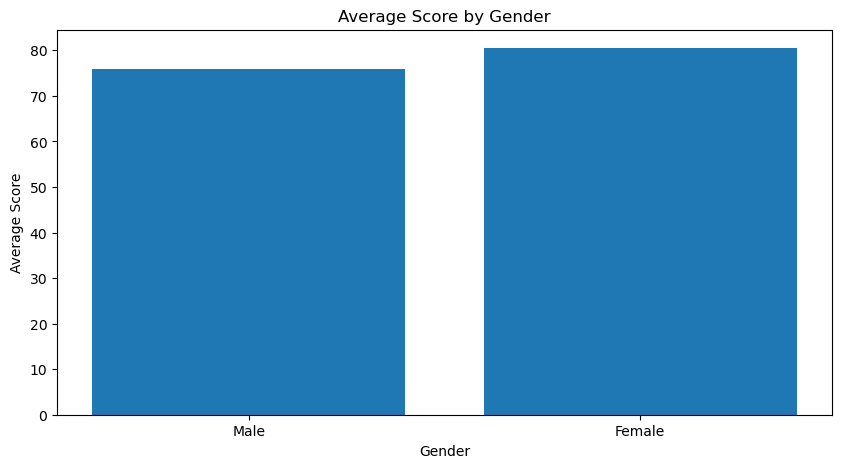

In [137]:
# Use matplotlib.pyplot library as it is required to make different graphs
import matplotlib.pyplot as plt

# Calculate the average score for each student (on the fly)
board['Average'] = board[['Math', 'GEAS', 'Electronics', 'Communication']].mean(axis=1)

# Create a bar plot for Average Score by Gender
plt.figure(figsize=(10, 5))  # Set the size of the figure
plt.bar(board['Gender'], board['Average'])  # Plot the average scores calculated above
plt.title('Average Score by Gender')  # Add a title
plt.xlabel('Gender')  # Label the x-axis
plt.ylabel('Average Score')  # Label the y-axis
plt.show()  # Display the plot

2. `Track (College) Bar Chart:` The bar chart below are for different academic tracks (e.g., Instrumentation, Communication, Electronics) that will allow visual comparison of how students from various fields perform. This visualization can highlight whether a particular track has consistently higher or lower average scores.

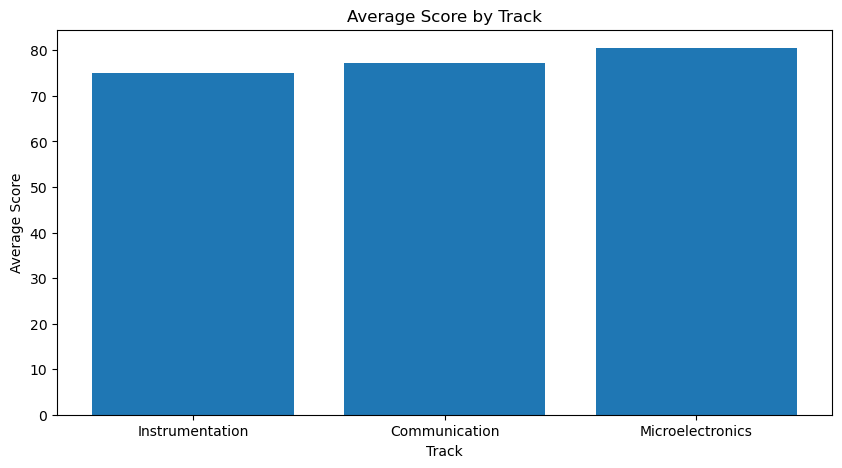

In [133]:
# Calculate the average score for each student (on the fly)
board['Average'] = board[['Math', 'GEAS', 'Electronics', 'Communication']].mean(axis=1)

# Create a bar plot for Average Score by Track
plt.figure(figsize=(10, 5)) # Set the size of the figure
plt.bar(board['Track'], board['Average']) # Plot the average scores
plt.title('Average Score by Track')  # Add a title
plt.xlabel('Track')  # Label the x-axis
plt.ylabel('Average Score')  # Label the y-axis
plt.show()  # Display the plot

3. `Hometown Bar Chart:` The bar chart below visualizes the average score distributions across hometowns (Visayas, Luzon, Mindanao), to observe geographical trends in performance. For instance, students from one region might have higher average scores compared to others.

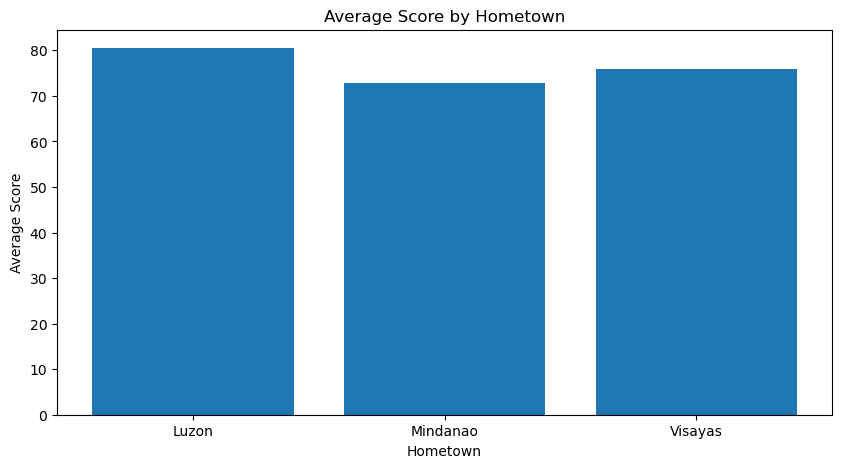

In [135]:
# Calculate the average score for each student (on the fly)
board['Average'] = board[['Math', 'GEAS', 'Electronics', 'Communication']].mean(axis=1)

# Create a bar plot for Average Score by Hometown
plt.figure(figsize=(10, 5))  # Set the size of the figure
plt.bar(board['Hometown'], board['Average'])  # Plot the average scores
plt.title('Average Score by Hometown')  # Add a title
plt.xlabel('Hometown')  # Label the x-axis
plt.ylabel('Average Score')  # Label the y-axis
plt.show()  # Display the plot

### Data Observation: 

##### Based on the observations, it appears that gender, hometown, and track do have an impact on average scores. 

##### Female students generally outperform their male counterparts in terms of average grades. Among the various disciplines, Microelectronics stands out with the highest average grades, closely followed by Communication. Instrumentation, in contrast, registers the lowest average grades. Geographically, Luzon leads with the highest average grades, with Visayas in the middle range, while Mindanao reports the lowest average grades.